In [1]:
from mesh_lib import *

from VPINN_tri_final_batch import *

from PROBDEF import PROBDEF
#kjsdhkjsdahfkjsh

2023-11-25 11:53:21.024401: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-25 11:53:21.026324: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-25 11:53:21.062216: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-25 11:53:21.063202: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-25 11:53:21.921363: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co


my_types lib imported


interpolator_lib imported

settings_lib imported 


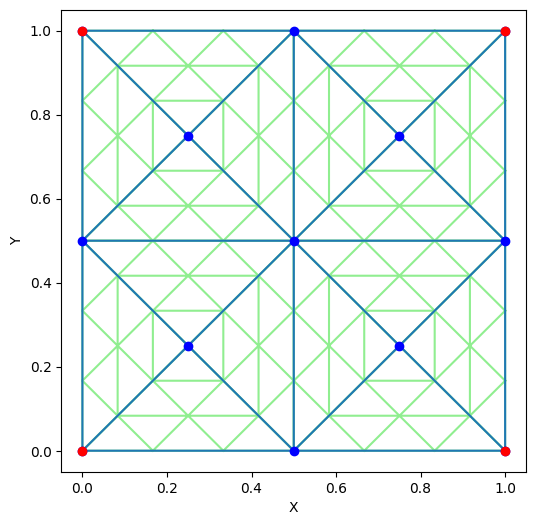

In [2]:
#seed
initializer=tf.keras.initializers.GlorotUniform(seed=42)


domain=((0,0),(1,0),(1,1),(0,1))

mesh = Mesh(domain, H = 0.1, N = 4)
mesh.plot_sub_mesh()

In [3]:
#network bulding 


#glorot uniform is the key 
model = tfk.models.Sequential()
model.add(tf.keras.Input(shape=(2,),dtype=tf.float64))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371 (2.90 KB)
Trainable params: 371 (2.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
params = {'scheme': 'VPINNs',
            'n_quad': 50,
            'n_bound': 100, # points inside every edge,so in total you will have 80*4 +4 boundary points 
            'iter': 1000 ,
            'n_test':2}

In [6]:
pb=PROBDEF()

degree =  2  , local dof =  6  internal dof =  0  points inside each edge =  1
[[0 0]
 [1 0]
 [0 1]
 [1/2 0]
 [1/2 1/2]
 [0 1/2]]


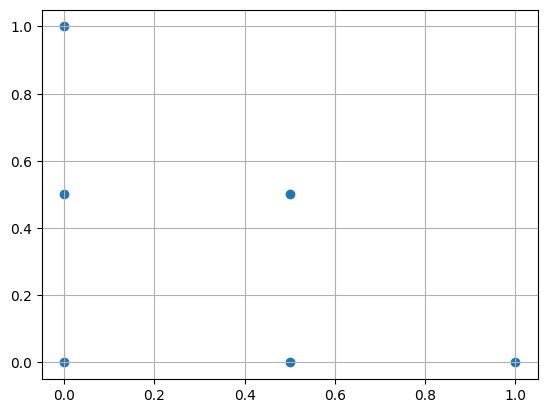

degree =  2  , local dof =  6  internal dof =  0  points inside each edge =  1
[[0 0]
 [1 0]
 [0 1]
 [1/2 0]
 [1/2 1/2]
 [0 1/2]]


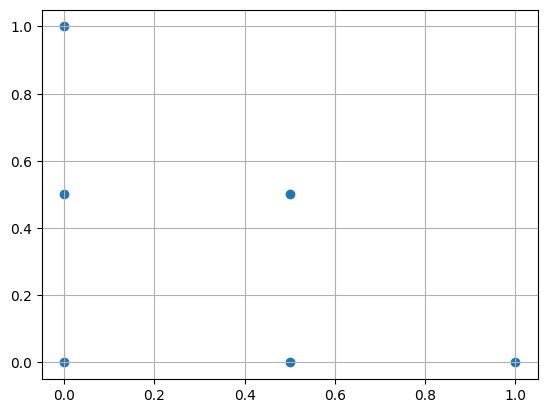

In [7]:
vp=VPINN(pb,params,mesh,model)

In [8]:
#training 
history=vp.train(2000)


Iteration: 0 loss: 21.3282527857 time: 23.504478216171265
Iteration: 10 loss: 5.5936591709 time: 2.8762691020965576
Iteration: 20 loss: 5.4927253224 time: 2.8409438133239746
Iteration: 30 loss: 5.4812086643 time: 2.9620938301086426
Iteration: 40 loss: 5.4693635769 time: 2.8702735900878906
Iteration: 50 loss: 5.4529493763 time: 2.812495708465576
Iteration: 60 loss: 5.4244073615 time: 2.7972092628479004
Iteration: 70 loss: 5.3529007060 time: 2.8508028984069824
Iteration: 80 loss: 5.0531568312 time: 2.826704502105713
Iteration: 90 loss: 3.8647977352 time: 2.8487658500671387
Iteration: 100 loss: 3.1943987010 time: 2.878021001815796
Iteration: 110 loss: 2.8410767702 time: 2.86236572265625
Iteration: 120 loss: 2.5271661267 time: 2.9499032497406006
Iteration: 130 loss: 2.2913408859 time: 2.8910441398620605
Iteration: 140 loss: 2.1374368348 time: 2.854262590408325
Iteration: 150 loss: 2.0116306786 time: 2.853111505508423
Iteration: 160 loss: 1.8867486563 time: 2.867330551147461
Iteration: 170 

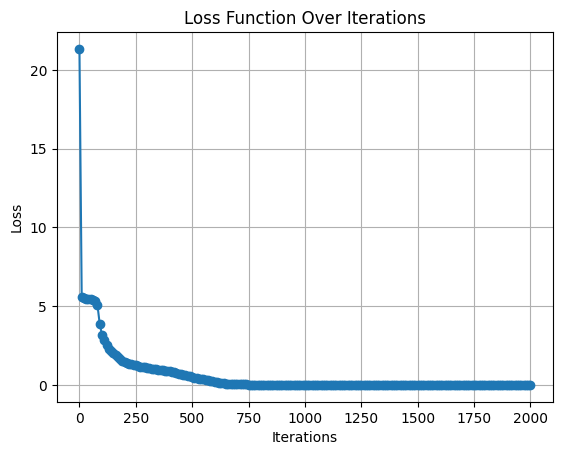

In [9]:
iterations = range(0, len(history) * 10, 10)  # Assuming losses are provided every 100 iterations

plt.plot(iterations, history, marker='o')
plt.title('Loss Function Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

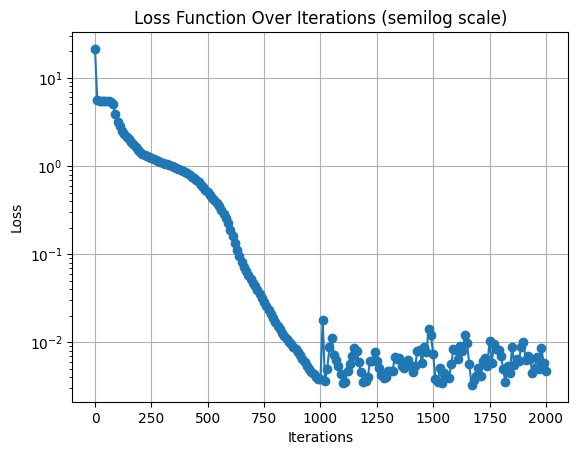

In [10]:
plt.semilogy(iterations, history, marker='o')
plt.title('Loss Function Over Iterations (semilog scale)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [11]:
x=np.linspace(0,1,100,dtype=np.float32)

def u_exact(x,y):

    return np.cos(2*np.pi*x)*np.sin(2*np.pi*y)


eval_exact=[u_exact(x[i],0.80) for i in range(len(x))]

eval_net=[vp.u_NN(x[i],0.80) for i in range(len(x))]

eval_exact=np.array(eval_exact)
eval_net=np.array(eval_net)

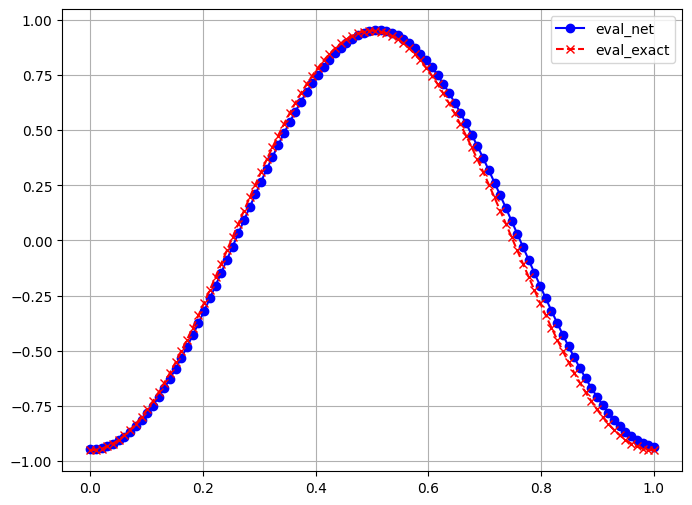

In [12]:
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot the data
plt.plot(x, eval_net, label='eval_net', linestyle='-', marker='o', color='b')
plt.plot(x, eval_exact, label='eval_exact', linestyle='--', marker='x', color='r')
plt.grid()
plt.legend()

#if you want reproducibility put a seed

In [13]:
#integration
"""from scipy.integrate import dblquad
integral,error=dblquad(lambda x,y: (u_exact(x,y)-vp.u_NN(x,y))**2, 0.0, 1.0,0.0, 1.0)

L2_error=np.sqrt(integral)
print(L2_error,error)"""

'from scipy.integrate import dblquad\nintegral,error=dblquad(lambda x,y: (u_exact(x,y)-vp.u_NN(x,y))**2, 0.0, 1.0,0.0, 1.0)\n\nL2_error=np.sqrt(integral)\nprint(L2_error,error)'

In [14]:
## Add surface plot
import numpy as np
x=np.linspace(0,1,50,dtype=np.float32)
XX,YY = np.meshgrid(x,x)
xx = XX.flatten()
yy = YY.flatten()

X = np.vstack((xx,yy)).transpose()
print(X)
Z = [vp.u_NN(x[0],x[1]) for x in X]

[[0.         0.        ]
 [0.02040816 0.        ]
 [0.04081633 0.        ]
 ...
 [0.9591837  1.        ]
 [0.97959185 1.        ]
 [1.         1.        ]]


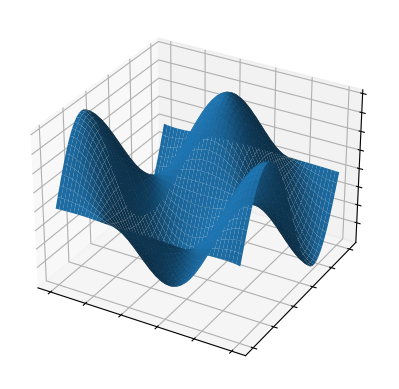

Text(0.5, 0.92, 'Original Code')

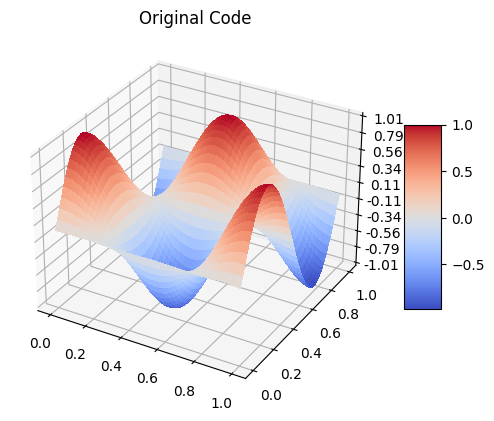

In [15]:
# Plot the surface
z = np.array(Z).flatten().reshape((50,50))
# z = np.reshape(z, (50,50))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(XX, YY, z, vmin=z.min() * 2)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(XX, YY, z, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Original Code')